<a href="https://colab.research.google.com/github/pramodkumhal/Employee-Attrition-Prediction/blob/main/Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Employee Attrition Prediction

## Importing LIbrary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Emp_data = pd.read_csv("/content/Dataset01-Employee_Attrition.csv")
Emp_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
Emp_data.shape

(14999, 10)

In [4]:
Emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
Emp_data[Emp_data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
Emp_data1 = Emp_data.drop_duplicates()
Emp_data1.shape

(11991, 10)

In [7]:
Emp_data1.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


## Data exploration and visualizaton

In [8]:
Emp_data1['left'].value_counts()

,count
left,
0,10000
1,1991


### Impact of salaryon employee retention

<Axes: xlabel='left'>

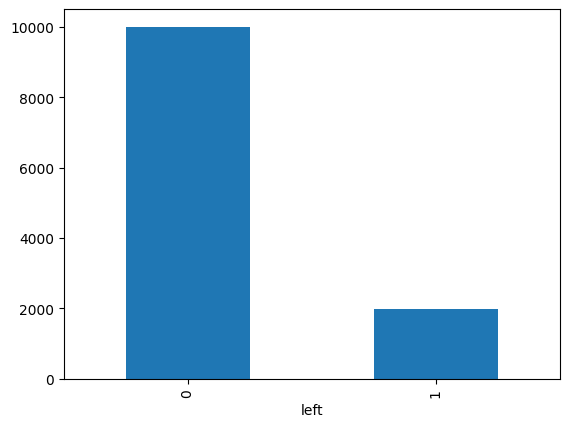

In [9]:
Emp_data1['left'].value_counts().plot(kind='bar')

In [10]:
Emp_data1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


###Impact of salary on employee retention

In [11]:
pd.crosstab(Emp_data1.salary, Emp_data1.left)

left,0,1
salary,,
high,942,48
low,4566,1174
medium,4492,769


<Axes: xlabel='salary'>

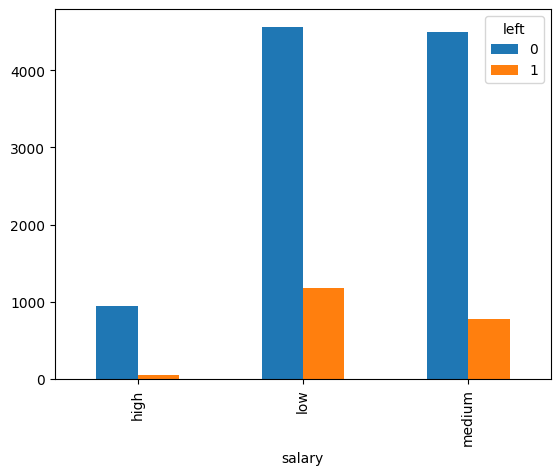

In [12]:
pd.crosstab(Emp_data1.salary, Emp_data1.left).plot(kind='bar')

###Department wise employee retention rate

In [13]:
pd.crosstab(Emp_data1.Department, Emp_data1.left)

left,0,1
Department,,
IT,818,158
RandD,609,85
accounting,512,109
hr,488,113
management,384,52
marketing,561,112
product_mng,576,110
sales,2689,550
support,1509,312


<Axes: xlabel='Department'>

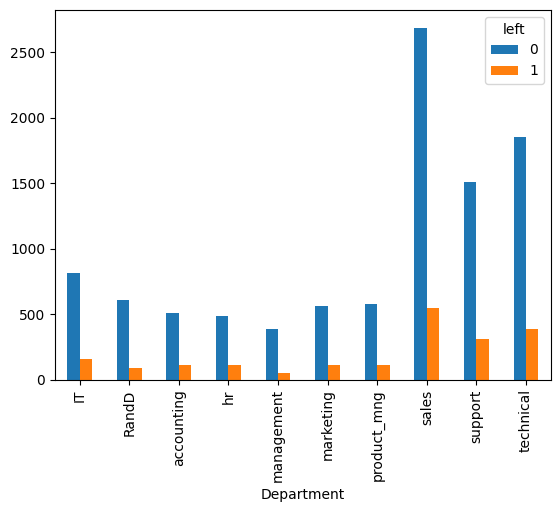

In [14]:
pd.crosstab(Emp_data1.Department, Emp_data1.left).plot(kind='bar')

##Distribution of each Numerical features:

In [15]:
num_feature_list1 = [f for f in Emp_data1.columns if Emp_data1.dtypes[f]=='float64']
num_feature_list1

['satisfaction_level', 'last_evaluation']

In [16]:
num_feature_list2 = [f for f in Emp_data1.columns if Emp_data1.dtypes[f]=='int64']
num_feature_list2

['number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

In [17]:
num_col_list = ['number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years','satisfaction_level', 'last_evaluation']


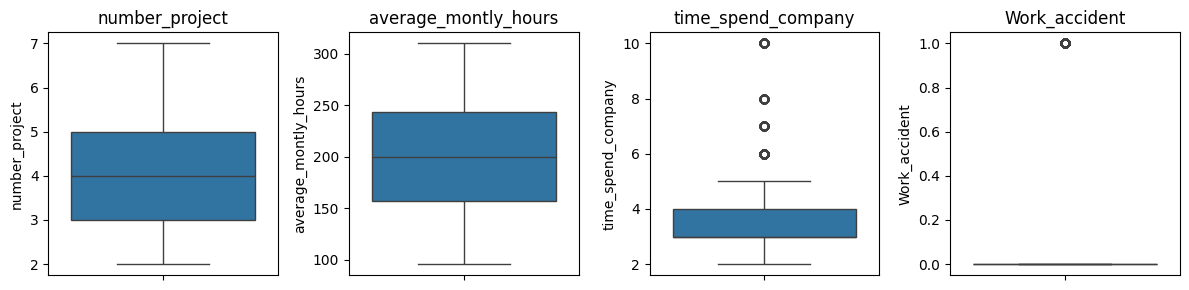

In [18]:
fig, axes= plt.subplots(ncols=4, figsize=(12,3))
for column, axis in zip(num_col_list[:4],axes):
  sns.boxplot(data = Emp_data1[column],ax=axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

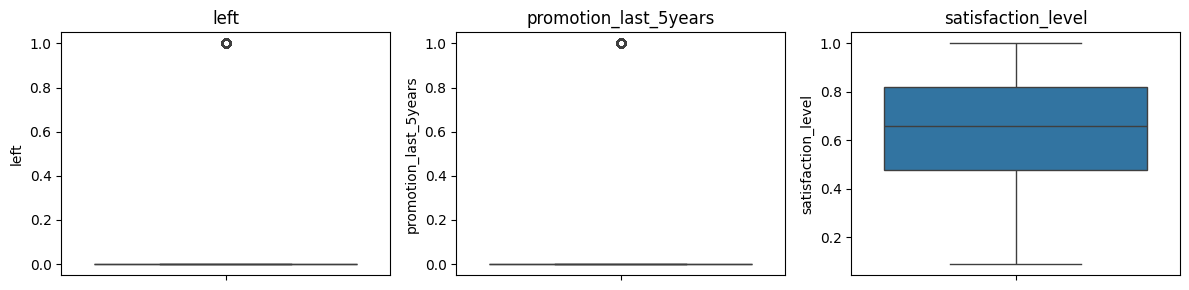

In [19]:
fig, axes= plt.subplots(ncols=3, figsize=(12,3))
for column, axis in zip(num_col_list[4:],axes):
  sns.boxplot(data = Emp_data1[column],ax=axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

<Axes: ylabel='Frequency'>

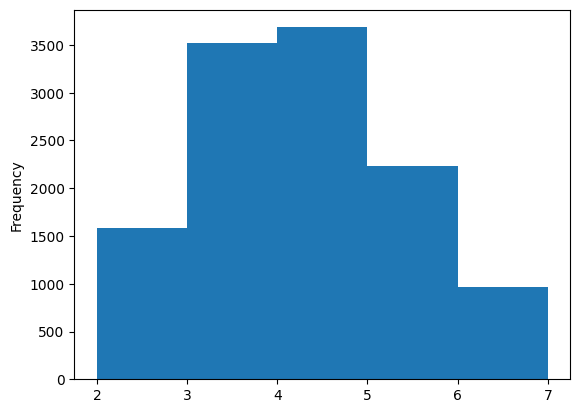

In [20]:
Emp_data1['number_project'].plot(kind='hist',bins=5)

<Axes: ylabel='Frequency'>

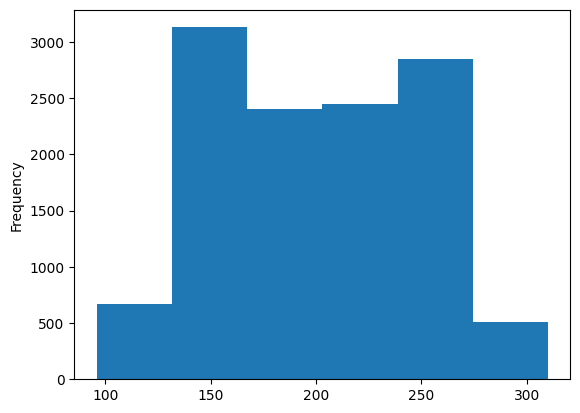

In [21]:
Emp_data1['average_montly_hours'].plot(kind='hist',bins=6)

<Axes: ylabel='Frequency'>

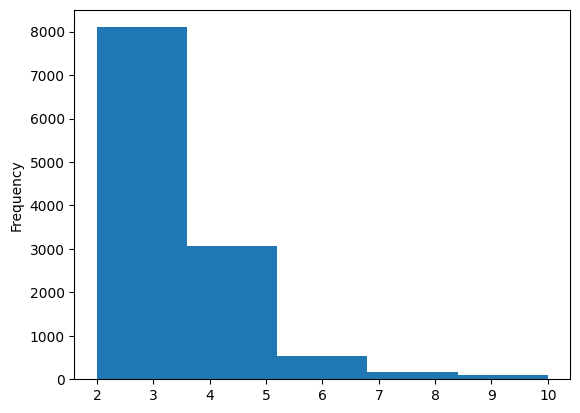

In [22]:
Emp_data1['time_spend_company'].plot(kind='hist',bins=5)

<Axes: ylabel='Frequency'>

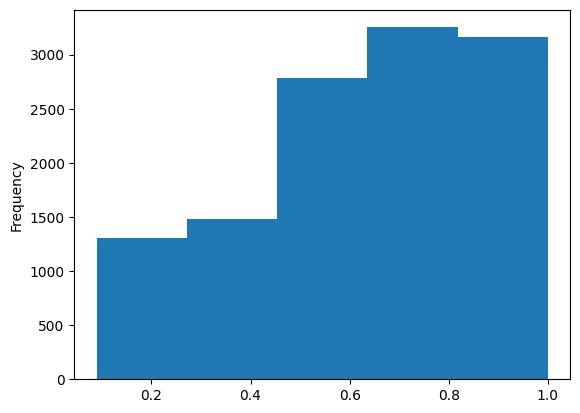

In [23]:
Emp_data1['satisfaction_level'].plot(kind='hist',bins=5)

<Axes: ylabel='Frequency'>

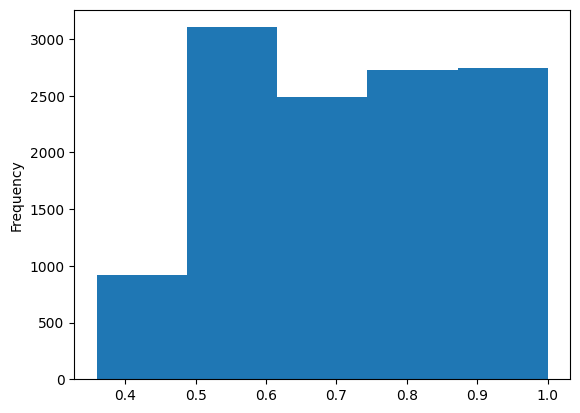

In [24]:
Emp_data1['last_evaluation'].plot(kind='hist',bins=5)

##Feature Engineering


### Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [26]:
Emp_data1['salary'] = label_encoder.fit_transform(Emp_data1['salary'])
Emp_data1['Department'] = label_encoder.fit_transform(Emp_data1['Department'])

<ipython-input-26-76d442e3bb6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Emp_data1['salary'] = label_encoder.fit_transform(Emp_data1['salary'])
<ipython-input-26-76d442e3bb6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Emp_data1['Department'] = label_encoder.fit_transform(Emp_data1['Department'])


In [27]:
Emp_data1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


### Dependent(Target) and Independent Variable

In [28]:
x = Emp_data1.drop('left', axis=1)
y = Emp_data1['left']

###Splittng data into Training and Testing

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

##Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [31]:
xtrain_scaled = std_scaler.fit_transform(x_train)
xtest_scaled = std_scaler.transform(x_test)

In [32]:
xtrain_scaled
xtest_scaled

array([[-2.22616534,  0.4312433 ,  1.89275291, ..., -0.13311211,
         0.39533766, -0.56181526],
       [ 0.4636721 ,  1.44221642,  0.17048512, ..., -0.13311211,
         0.74073148,  1.0287786 ],
       [ 0.7533469 ,  1.50168543,  0.17048512, ..., -0.13311211,
         0.39533766, -0.56181526],
       ...,
       [ 0.7533469 , -0.34185379, -0.69064878, ..., -0.13311211,
         0.39533766,  1.0287786 ],
       [ 0.29814364,  1.56115444,  0.17048512, ..., -0.13311211,
        -0.29544999, -0.56181526],
       [ 0.09123307, -0.10397776, -0.69064878, ..., -0.13311211,
         0.74073148, -0.56181526]])

##Model Development

###Random forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
Random_forest_model = RandomForestClassifier()
Random_forest_model.fit(xtrain_scaled, y_train)


RandomForestClassifier()

In [34]:
y_pred = Random_forest_model.predict(xtest_scaled)

###Confusion Matrix:

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1991,    7],
       [  39,  362]])

<Axes: >

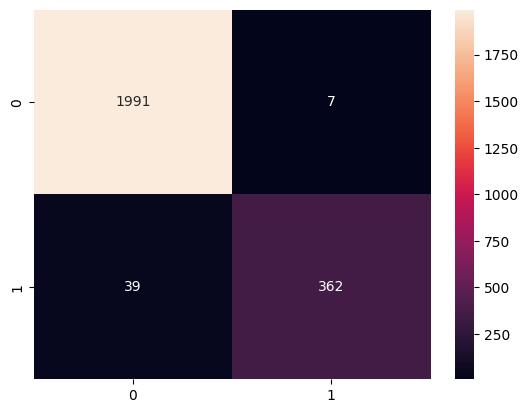

In [36]:
sns.heatmap(cm,annot=True,fmt='d')

###Accuracy:

In [37]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9808253438932889

###Precision:

In [38]:
from sklearn.metrics import precision_score
model_precision= precision_score(y_test, y_pred)
model_precision

0.981029810298103

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.90      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



###Feature Importance Metrix in Random Forest /Extraction

In [47]:
score_list = Random_forest_model.feature_importances_
list_of_features = list(x.columns)
score_df = pd.DataFrame({'Feature':list_of_features, "Score":score_list})
score_df.sort_values(by='Score',ascending=False)

,Feature,Score
0,satisfaction_level,0.354650
2,number_project,0.188871
3,average_montly_hours,0.158471
4,time_spend_company,0.157634
1,last_evaluation,0.114896
7,Department,0.012182
8,salary,0.007954
5,Work_accident,0.004635
6,promotion_last_5years,0.000707


###K Fold Cross Validation

In [49]:
#Appling 5-fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Random_forest_model, xtrain_scaled, y_train, cv=5,scoring='accuracy')
print('Cross-validation scores=',scores)

Cross-validation scores= [0.9890568  0.98332465 0.98540146 0.98540146 0.98748697]


In [50]:
Avg_Model_score = scores.mean()
print('Average Model Score=', Avg_Model_score)

Average Model Score= 0.9861342667936736


##Hyper Parameter tuning

###Grid Search CV | Random Search CV

In [51]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [54]:
parameters ={
    'n_estimators':[50,100,150],
    'max_features': ['sqrt','log2',None]
}

In [55]:
grid_search = GridSearchCV(estimator=Random_forest_model,
                           param_grid=parameters)

In [56]:
grid_search.fit(xtrain_scaled,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100, 150]})

In [57]:
grid_search.best_params_

{'max_features': 'log2', 'n_estimators': 100}

In [59]:
#Building New Model with best parameters
Random_forest_model_new = RandomForestClassifier(max_features='log2',n_estimators=100)
Random_forest_model_new.fit(xtrain_scaled,y_train)

RandomForestClassifier(max_features='log2')

In [60]:
#Appling 5-fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Random_forest_model_new, xtrain_scaled, y_train, cv=5,scoring='accuracy')
print('Cross-validation scores=',scores)

Cross-validation scores= [0.9890568  0.98384575 0.98488008 0.98540146 0.98748697]


In [61]:
Avg_Model_score = scores.mean()
print('Average Model Score=', Avg_Model_score)

Average Model Score= 0.9861342124553272
